In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import stft
import librosa
import keras
print keras.__version__, keras.backend.image_dim_ordering()

Couldn't import dot_parser, loading of dot files will not be possible.
1.1.0 th


Using Theano backend.


## Load audio signal

In [2]:
SR = 6000 # sampling rate
duration = 8.0
len_src = int(SR * duration)

src, sr = librosa.load('src/bensound-cute.mp3', sr=SR, duration=8.0)  # whole signal    
src = src[:duration*SR]

n_fft = 512


/Users/gnu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## Compute STFT using librosa

In [10]:
D = librosa.logamplitude(S=np.abs(librosa.stft(src, n_fft=n_fft, hop_length=128))**2, 
                         ref_power=np.max)
print D.shape
print 'Librosa STFT dynamic range', np.max(D), np.min(D)

(257, 376)
Librosa STFT dynamic range 3.8147e-06 -80.0


## Compute STFT using keras-stft

In [4]:
src_input = src[np.newaxis, :, np.newaxis]
print 'input source for keras-STFT', src_input.shape

stft_model = stft.Spectrogram(n_dft=n_fft, input_shape=(len_src, 1), n_hop=128,
                             border_mode='same')
output = stft_model.predict(src_input)

print output.shape
print 'Keras-STFT dynanic range', np.max(output), np.min(output)

input source for keras-STFT (1, 48000, 1)
(1, 257, 375)
Keras-STFT dynanic range 0.0 -80.0


## Plot them to compare

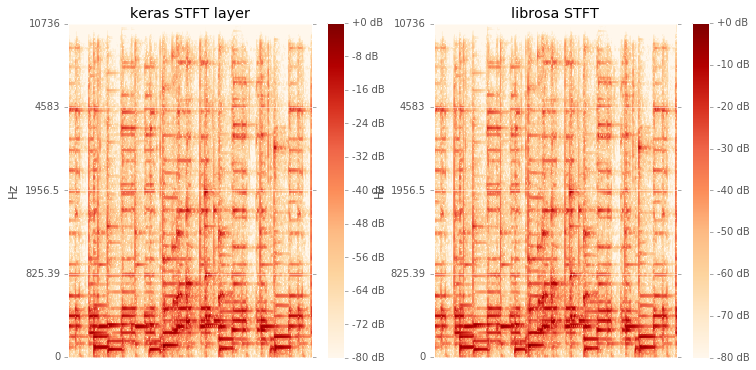

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
librosa.display.specshow(output[0], y_axis='linear', sr=SR, hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.title('keras STFT layer')
plt.subplot(1,2,2)
librosa.display.specshow(D, y_axis='linear', sr=SR, hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.title('librosa STFT')

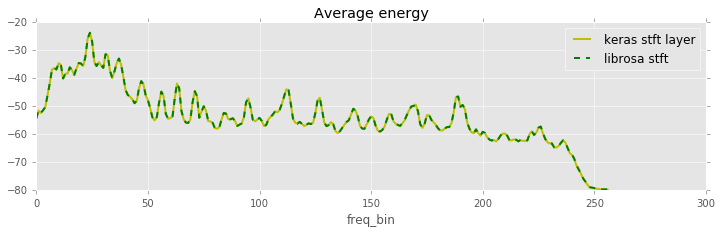

In [6]:
plt.figure(figsize=(12, 3))
plt.plot(np.mean(output[0], axis=1), 'y', linewidth=2, label='keras stft layer')
plt.plot(np.mean(D, axis=1), 'g--', linewidth=2, label='librosa stft')
plt.xlabel('freq_bin')
plt.title('Average energy')
plt.legend()